In [3]:
import audio
import cv2
import librosa
from matplotlib import pyplot as plt
from librosa.display import waveplot
import IPython.display as ipd
import pandas as pd
import os

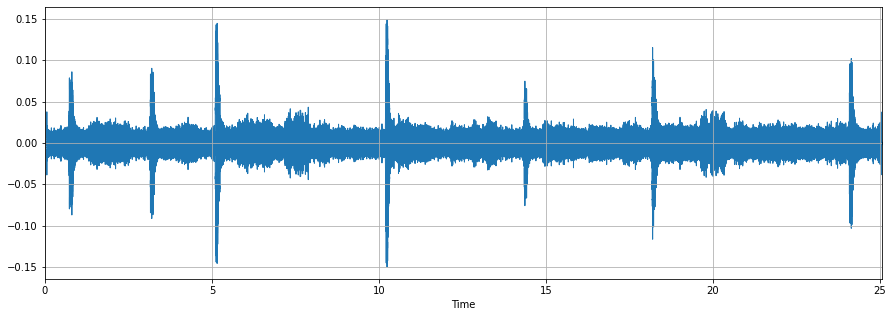

In [3]:
audio_path = 'data/birdclef-2021/train_short_audio/acafly/\XC135020.ogg'

sig, rate = librosa.load(audio_path, sr=None, offset=None, duration=None)
plt.figure(figsize=(15, 5))
plt.grid('on')
librosa.display.waveplot(sig, sr = rate)
plt.show()
ipd.Audio(audio_path)

In [ ]:
seconds = 3
overlap = 0

for i, spec in enumerate(audio.specs_from_file(audio_path, seconds, overlap, shape=(128, 256), fmin=500,fmax=22500)):
    start = i*(seconds-overlap)
    end = i*(seconds-overlap) + seconds
    print("Start = %d, end = %d, SNR = %.3f" % (start, end, audio.signal2noise(spec)), end = '\r')
    cv2.imshow("a", spec)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.destroyAllWindows()

In [ ]:
2 seconds - 0.01
# Maybe take N with the highest SNR?
cv2.imwrite()

In [4]:
df = pd.read_csv('data/birdclef-2021/train_metadata.csv')

In [5]:
n_samples = df.shape[0]
seconds = 5
overlap = 2

for i_sample in range(2):
    print("Sample %d of %d" % (i_sample+1, n_samples), end = '\r')
    load_path = "data/birdclef-2021/train_short_audio/" + df.primary_label[i_sample] + "/" + df.filename[i_sample]
    specs = audio.specs_from_file(load_path, seconds, overlap, shape=(128, 256), fmin=500,fmax=22500)

    for i, spec in enumerate(specs):
        snr = audio.signal2noise(spec)
#         img_name = df.filename[i_sample].split('.ogg')[0]
        root_save_dir = "data/birdclef-2021-parsed/train_short_audio/"
        if snr > 0.01:
            save_dir = root_save_dir + "%s/" % (df.primary_label[i_sample])
        else:
            save_dir = root_save_dir + "noise/"
            
        os.makedirs(save_dir, exist_ok = True)
        save_path = save_dir + "%s_%03d" % (df.filename[i_sample],i) + '.png'
        cv2.imwrite(save_path, (spec*255))
        #print(save_path)

data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_000.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_001.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_002.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_003.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_004.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_005.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_006.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_007.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_008.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_009.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_010.png


c:\users\katane\appdata\local\programs\python\python38\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_011.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_012.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_013.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_014.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_015.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_016.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_017.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_018.png
data/birdclef-2021-parsed/train_short_audio/noise/XC109605.ogg_019.png
data/birdclef-2021-parsed/train_short_audio/acafly/XC11209.ogg_000.png
data/birdclef-2021-parsed/train_short_audio/acafly/XC11209.ogg_001.png
data/birdclef-2021-parsed/train_short_audio/acafly/XC11209.ogg_002.png
data/birdclef-2021-parsed/train_short_audio/acafly/XC11209.ogg_003.png


## To work with tf dataset batching

In [ ]:
# To use tf dataset fetching

n_samples = df.shape[0]
seconds = 5
overlap = 2
cwd = os.getcwd()
for i_sample in range(n_samples):
    print("Sample %d of %d" % (i_sample+1, n_samples), end = '\r')
    load_path = "data/birdclef-2021/train_short_audio/" + df.primary_label[i_sample] + "/" + df.filename[i_sample]
    bird_path = os.path.join(cwd, "data", "birdclef-2021-parsed", "train_short_audio", df.primary_label[i_sample])
    specs = audio.specs_from_file(load_path, seconds, overlap, shape=(128, 256), fmin=500,fmax=22500)

    for i, spec in enumerate(specs):
        snr = audio.signal2noise(spec)
        img_name = df.filename[i_sample].split('.ogg')[0]
        root_save_dir = "data/birdclef-2021-parsed/train_short_audio/%s/%s" %(df.primary_label[i_sample], img_name)
        if snr > 0.01:
            # save_dir = root_save_dir + "/signal/"
            os.makedirs(bird_path, exist_ok = True)
            save_path = bird_path + "//" + str(i_sample) + ".png"
            cv2.imwrite(save_path, (spec*255))
    # Remove below for whole
    if i_sample == 763:
        break        

In [55]:
load_path.split('.ogg')

['data/birdclef-2021/train_short_audio/acafly/XC11209', '']

In [53]:
i_sample = 62873
load_path = "data/birdclef-2021/train_short_audio/" + df.primary_label[i_sample] + "/" + df.filename[i_sample]
print(load_path)

data/birdclef-2021/train_short_audio/yetvir/XC615888.ogg
